In this notebook, I am analysing the trends in the number of COVID-19 cases in Alberta, Canada 

In [504]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
# importing datetime module 
from datetime import *
from dateutil.parser import parse
#scikits.timeseries

In [505]:
covid_can = pd.read_csv('./Python_DS/Week9_FinalProject/covid19-Canada.csv')
covid_can.shape

(3807, 35)

In [506]:
covid_can

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,4,0,0.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,4,0,0.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Canada,Canada,2020-02-08,7,0,0.0,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,2020-02-16,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59,British Columbia,Colombie-Britannique,2020-02-16,5,0,0.0,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Canada,Canada,2020-02-16,8,0,0.0,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,2020-02-21,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can't apply linear regression model on strings. I first converted date from string to datetime object and then converted datetime to floats 

In [507]:
# converts string to datetime
covid_can['date'] = pd.to_datetime(covid_can['date'])
# converts datetime to float 
covid_can['date'] = pd.to_numeric(covid_can['date'])
covid_can['date']

0       1580428800000000000
1       1580428800000000000
2       1580428800000000000
3       1581120000000000000
4       1581120000000000000
5       1581120000000000000
6       1581811200000000000
7       1581811200000000000
8       1581811200000000000
9       1582243200000000000
10      1582243200000000000
11      1582243200000000000
12      1582502400000000000
13      1582502400000000000
14      1582502400000000000
15      1582588800000000000
16      1582588800000000000
17      1582588800000000000
18      1582675200000000000
19      1582675200000000000
20      1582675200000000000
21      1582761600000000000
22      1582761600000000000
23      1582761600000000000
24      1582934400000000000
25      1582934400000000000
26      1582934400000000000
27      1583020800000000000
28      1583020800000000000
29      1583020800000000000
               ...         
3777    1605312000000000000
3778    1605312000000000000
3779    1605312000000000000
3780    1605312000000000000
3781    160531200000

In [508]:
covid_can['numactive']

0           3.0
1           1.0
2           4.0
3           3.0
4           4.0
5           7.0
6           3.0
7           5.0
8           8.0
9           3.0
10          6.0
11          9.0
12          4.0
13          6.0
14         10.0
15          4.0
16          7.0
17         11.0
18          5.0
19          7.0
20         12.0
21          6.0
22          7.0
23         13.0
24          8.0
25          7.0
26         15.0
27         15.0
28          8.0
29          1.0
         ...   
3777     5794.0
3778     9616.0
3779     1691.0
3780     6410.0
3781    12188.0
3782    12364.0
3783        8.0
3784       19.0
3785       21.0
3786        4.0
3787        1.0
3788        5.0
3789        4.0
3790        0.0
3791    48125.0
3792     5794.0
3793    10601.0
3794     1807.0
3795     6715.0
3796    12345.0
3797    12380.0
3798       10.0
3799       22.0
3800       21.0
3801        4.0
3802        1.0
3803        5.0
3804       18.0
3805        0.0
3806    49723.0
Name: numactive, Length:

In [509]:
covid_can['prnameFR']

0                         Ontario
1            Colombie-Britannique
2                          Canada
3                         Ontario
4            Colombie-Britannique
5                          Canada
6                         Ontario
7            Colombie-Britannique
8                          Canada
9                         Ontario
10           Colombie-Britannique
11                         Canada
12                        Ontario
13           Colombie-Britannique
14                         Canada
15                        Ontario
16           Colombie-Britannique
17                         Canada
18                        Ontario
19           Colombie-Britannique
20                         Canada
21                        Ontario
22           Colombie-Britannique
23                         Canada
24                        Ontario
25           Colombie-Britannique
26                         Canada
27                        Ontario
28           Colombie-Britannique
29            

In [510]:
covid_ab = covid_can['prnameFR'].str.contains('Alberta')

In [512]:
covid_can[covid_ab]

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
50,48,Alberta,Alberta,1583625600000000000,1,0,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,48,Alberta,Alberta,1583712000000000000,7,0,0.0,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,48,Alberta,Alberta,1583884800000000000,14,0,0.0,14,1969.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,48,Alberta,Alberta,1583971200000000000,19,0,0.0,19,4109.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,48,Alberta,Alberta,1584057600000000000,23,0,0.0,23,4109.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,48,Alberta,Alberta,1584144000000000000,29,0,0.0,29,5247.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,48,Alberta,Alberta,1584230400000000000,39,0,0.0,39,5247.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,48,Alberta,Alberta,1584316800000000000,56,0,0.0,56,10238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,48,Alberta,Alberta,1584403200000000000,74,0,0.0,74,11487.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,48,Alberta,Alberta,1584489600000000000,97,0,0.0,97,13686.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
mask = covid_can[covid_ab].numactive

In [514]:
# To get number of active cases in Alberta from Oct 1 to Nov 15
mask1 = covid_can[covid_ab].numactive[206:350]

In [515]:
mask1

3118     1596.0
3133     1558.0
3148     1558.0
3163     1558.0
3178     1783.0
3193     1900.0
3208     1910.0
3223     2097.0
3238     2225.0
3253     2225.0
3268     2225.0
3283     2225.0
3298     2615.0
3313     2689.0
3328     2738.0
3343     2836.0
3358     2836.0
3373     2836.0
3388     3138.0
3403     3203.0
3418     3372.0
3433     3519.0
3448     3651.0
3463     3651.0
3478     3651.0
3493     4477.0
3508     4738.0
3523     4793.0
3538     4921.0
3553     5172.0
3568     5753.0
3583     6278.0
3598     6870.0
3613     6110.0
3628     6230.0
3643     7032.0
3658     6822.0
3673     7736.0
3688     8457.0
3703     7965.0
3718     8090.0
3733     8755.0
3748     8305.0
3763     8593.0
3778     9616.0
3793    10601.0
Name: numactive, dtype: float64

In [516]:
mask2 = covid_can[covid_ab].date
mask2

50      1583625600000000000
55      1583712000000000000
58      1583884800000000000
73      1583971200000000000
88      1584057600000000000
103     1584144000000000000
118     1584230400000000000
133     1584316800000000000
148     1584403200000000000
163     1584489600000000000
178     1584576000000000000
193     1584662400000000000
208     1584748800000000000
223     1584835200000000000
238     1584921600000000000
253     1585008000000000000
268     1585094400000000000
283     1585180800000000000
298     1585267200000000000
313     1585353600000000000
328     1585440000000000000
343     1585526400000000000
358     1585612800000000000
373     1585699200000000000
388     1585785600000000000
403     1585872000000000000
418     1585958400000000000
433     1586044800000000000
448     1586131200000000000
463     1586217600000000000
               ...         
3358    1602892800000000000
3373    1602979200000000000
3388    1603065600000000000
3403    1603152000000000000
3418    160323840000

In [517]:
# To get dates from Oct 1 to Nov 15
mask3 = covid_can[covid_ab].date[206:350]
mask3

3118    1601510400000000000
3133    1601596800000000000
3148    1601683200000000000
3163    1601769600000000000
3178    1601856000000000000
3193    1601942400000000000
3208    1602028800000000000
3223    1602115200000000000
3238    1602201600000000000
3253    1602288000000000000
3268    1602374400000000000
3283    1602460800000000000
3298    1602547200000000000
3313    1602633600000000000
3328    1602720000000000000
3343    1602806400000000000
3358    1602892800000000000
3373    1602979200000000000
3388    1603065600000000000
3403    1603152000000000000
3418    1603238400000000000
3433    1603324800000000000
3448    1603411200000000000
3463    1603497600000000000
3478    1603584000000000000
3493    1603670400000000000
3508    1603756800000000000
3523    1603843200000000000
3538    1603929600000000000
3553    1604016000000000000
3568    1604102400000000000
3583    1604188800000000000
3598    1604275200000000000
3613    1604361600000000000
3628    1604448000000000000
3643    160453440000

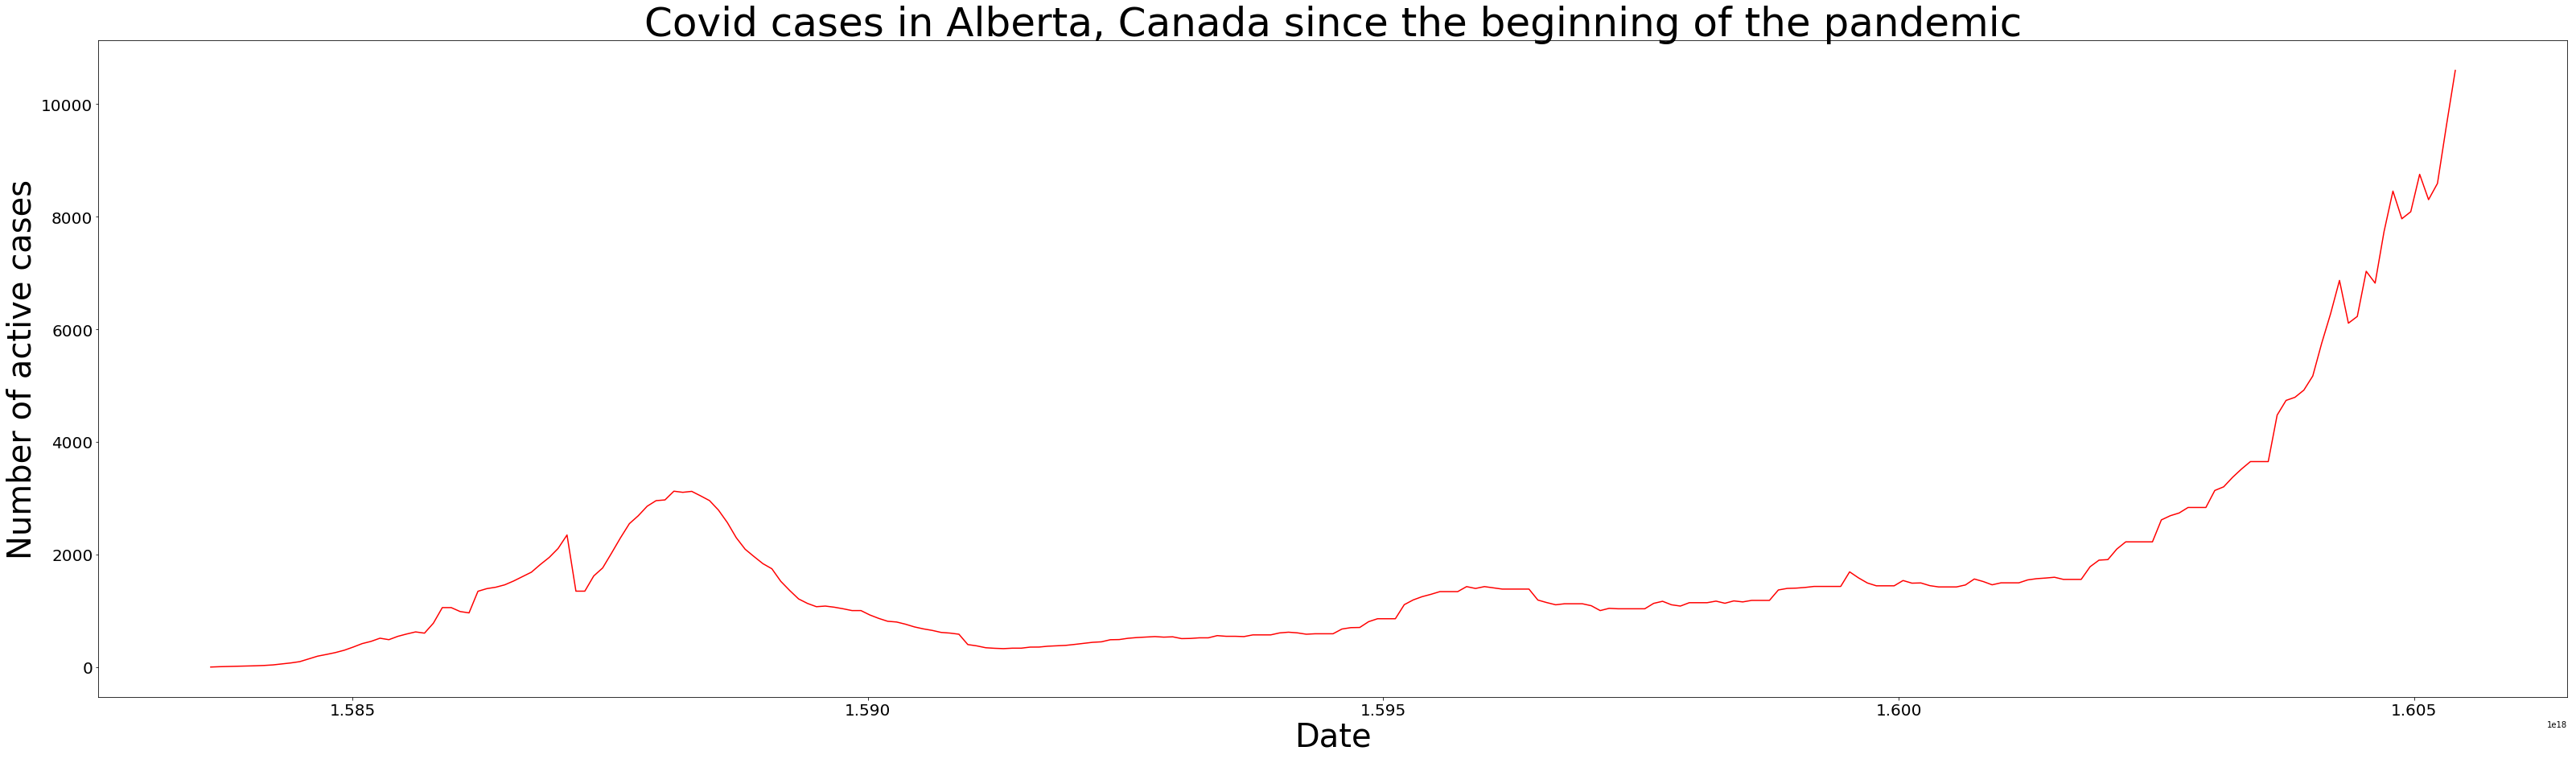

In [533]:
# Line plot that shows trends in the number of COVID-19 cases in Alberta since the beginning of the pandemic
plt.figure(figsize=(55,15))

#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

#ax.set_xticks([1585008000000000000, 1602028800000000000, 1605052800000000000])
#ax.set_xticklabels(['March 23','October 7', 'November 12'])


# to set tick labels font size 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# line plot the number of covid cases
plt.plot(mask2, mask, color = "red")

# Label the axes
plt.xlabel('Date', fontsize=40)
plt.ylabel('Number of active cases', fontsize=40)


#Label the figure
plt.title('Covid cases in Alberta, Canada since the beginning of the pandemic', fontsize=50)

# Add a legend
#plt.legend(('covidcases'), loc='upper left', fontsize=30);


plt.show()

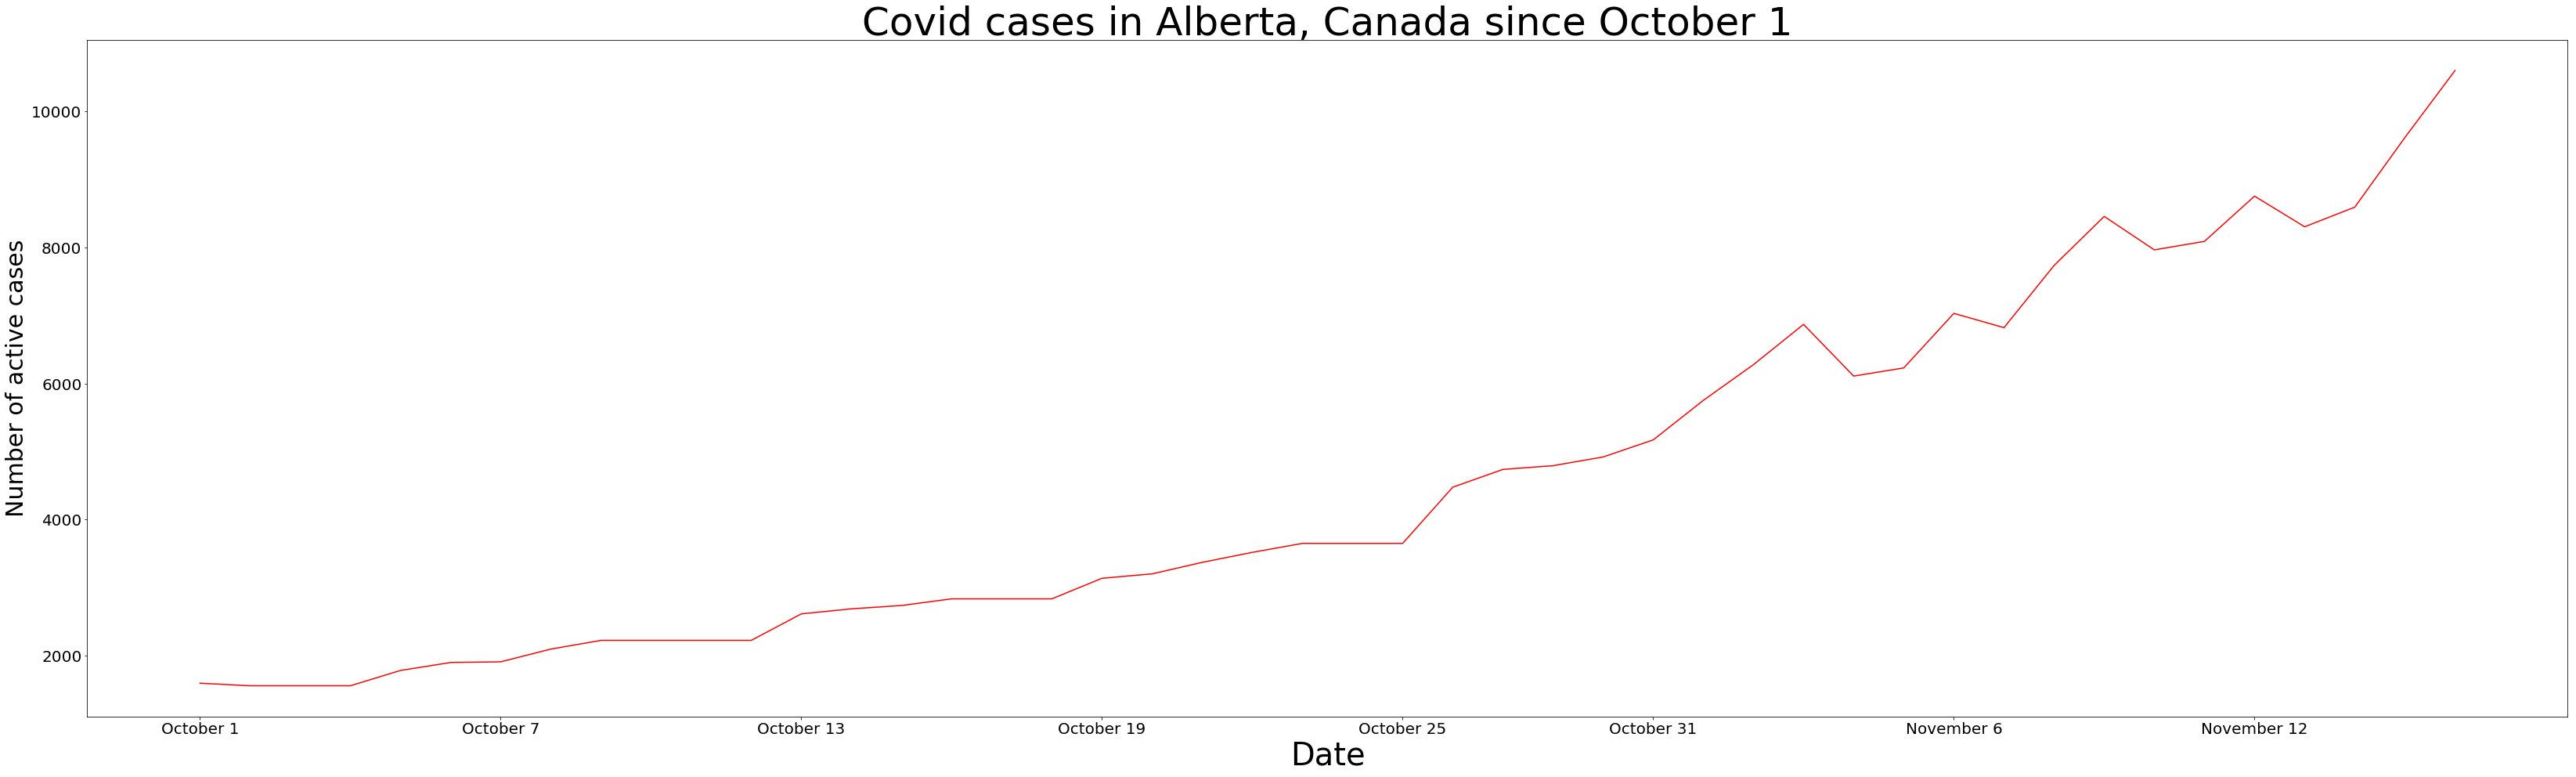

In [539]:
# Line plot that shows trends in the number of COVID-19 cases in Alberta since October 1
fig = plt.figure(figsize=(55,15))


ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.set_xticks([1601510400000000000, 1602028800000000000, 1602547200000000000,1603065600000000000,1603584000000000000,1604016000000000000,1604534400000000000, 1605052800000000000])
ax.set_xticklabels(['October 1','October 7','October 13', 'October 19','October 25','October 31', 'November 6', 'November 12'])

#to set tick labels font size 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# line plot the number of covid cases
plt.plot(mask3, mask1, color = "red")

# Label the axes
plt.xlabel('Date', fontsize=40)
plt.ylabel('Number of active cases', fontsize=30)


#Label the figure
plt.title('Covid cases in Alberta, Canada since October 1', fontsize=50)

# Add a legend
#plt.legend(('covidcases'), loc='upper left', fontsize=30);

plt.show()


In [461]:
features = ['date']
target =['numactive']

In [442]:
X = mask3
Y = mask1

In [444]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [445]:
regressor = LinearRegression()

I was getting this error "Expected 2D array, got 1D array instead". In order to avoid it I added values.reshape(-1,1)

In [446]:
regressor.fit(X_train.values.reshape(-1,1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [447]:
Y_prediction = regressor.predict(X_test.values.reshape(-1,1))
Y_prediction 

array([7577.10668399, 5016.89797327, 5199.77002404, 8491.46693782,
       6845.61848093, 7942.85078552, 1176.5849072 , 2639.56131332,
       1908.07311026,  993.71285643, 1542.32900873, 4834.02592251,
       6297.00232863, 3919.66566868, 3553.92156715, 2822.43336409])

Now, I would like to estimate the number of active cases on Dec 30

In [450]:
s = pd.Series(['2020-12-30'])
# converts string to datetime
sd = pd.to_datetime(s)
# converts datetime to float 
sf = pd.to_numeric(sd)

s_prediction = regressor.predict(sf.values.reshape(1,-1))
s_prediction

array([16903.58127303])

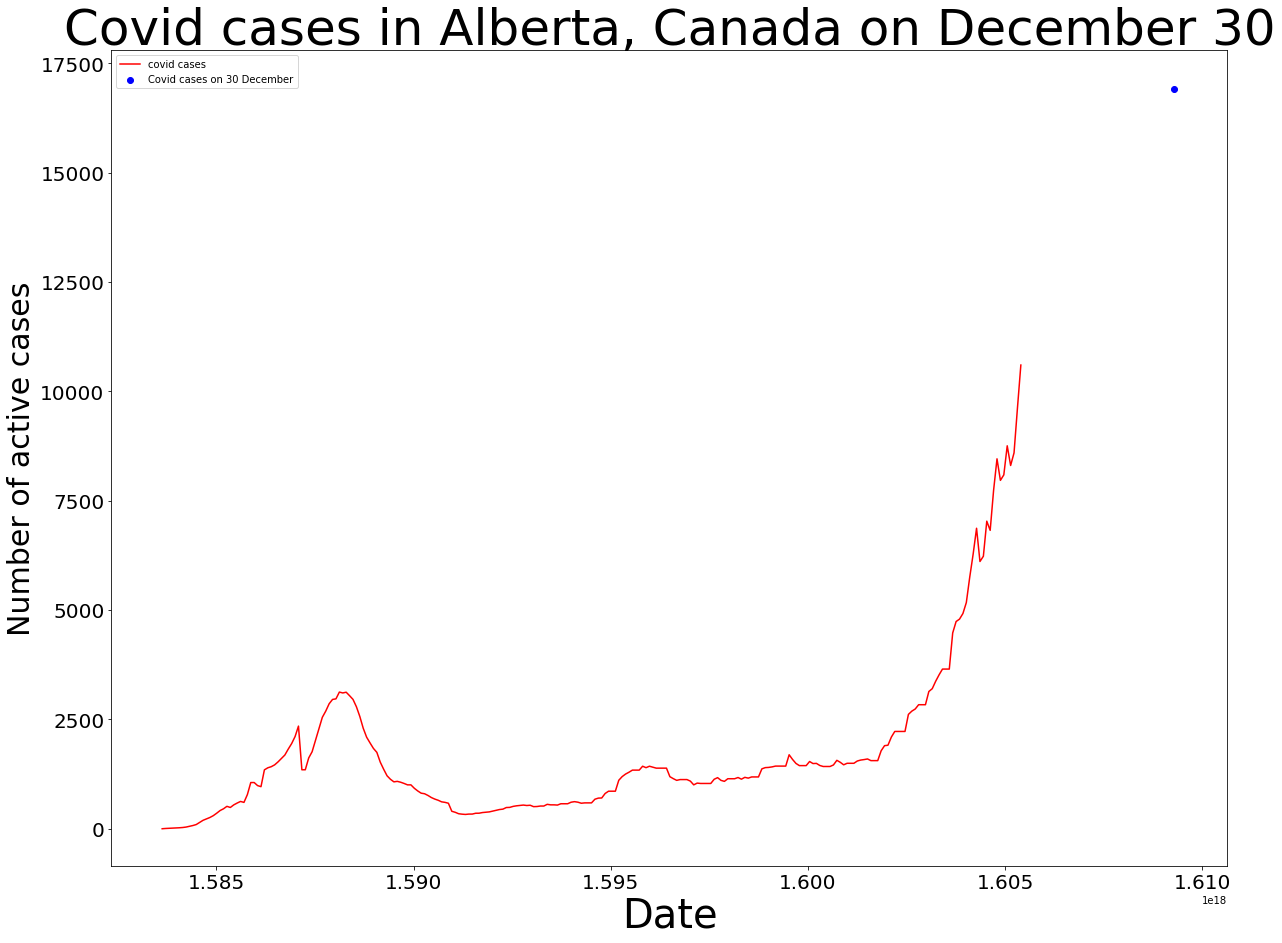

In [545]:
# Line plot that shows 
plt.figure(figsize=(20,15))

#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

#ax.set_xticks([1602028800000000000,1603065600000000000,1604016000000000000,1605052800000000000, 1602028800000000000,1603065600000000000,1604016000000000000,1605052800000000000])
#ax.set_xticklabels(['October 7','October 19','October 31','November 12', 'October 7','October 19','October 31','November 12'])

#to set tick labels font size 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# line plot the number of covid cases
plt.plot(mask2, mask, color = "red")
plt.scatter(sf, s_prediction, color = "blue")

# Label the axes
plt.xlabel('Date', fontsize=40)
plt.ylabel('Number of active cases', fontsize=30)


#Label the figure
plt.title('Covid cases in Alberta, Canada on December 30', fontsize=50)


# Add a legend
#plt.legend(('covid cases'), loc='upper left');
plt.legend(('covid cases', 'Covid cases on 30 December'), loc='upper left');
plt.show()